## Name and ID

Mattia Danese

## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/spring2021/comp135).

#### Import required libraries

In [2]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [3]:
# Load data
x_tr_N2 = np.loadtxt('data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [7]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list

n_runs = 16
models = []

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    models.append(mlp_lbfgs)
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))


finished LBFGS run  1/16 after    0.1 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  2/16 after    0.0 sec |  29 iters | converged    | loss 0.477
finished LBFGS run  3/16 after    0.0 sec |  21 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.0 sec |  35 iters | converged    | loss 0.347
finished LBFGS run  5/16 after    0.0 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  6/16 after    0.0 sec |  29 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.0 sec |  23 iters | converged    | loss 0.000
finished LBFGS run  8/16 after    0.0 sec |  37 iters | converged    | loss 0.347
finished LBFGS run  9/16 after    0.0 sec |  15 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    0.0 sec |  26 iters | converged    | loss 0.000
finished LBFGS run 11/16 after    0.1 sec |  36 iters | converged    | loss 0.347
finished LBFGS run 12/16 after    0.0 sec |  27 iters | converged    | loss 0.477
finished LBFGS r

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

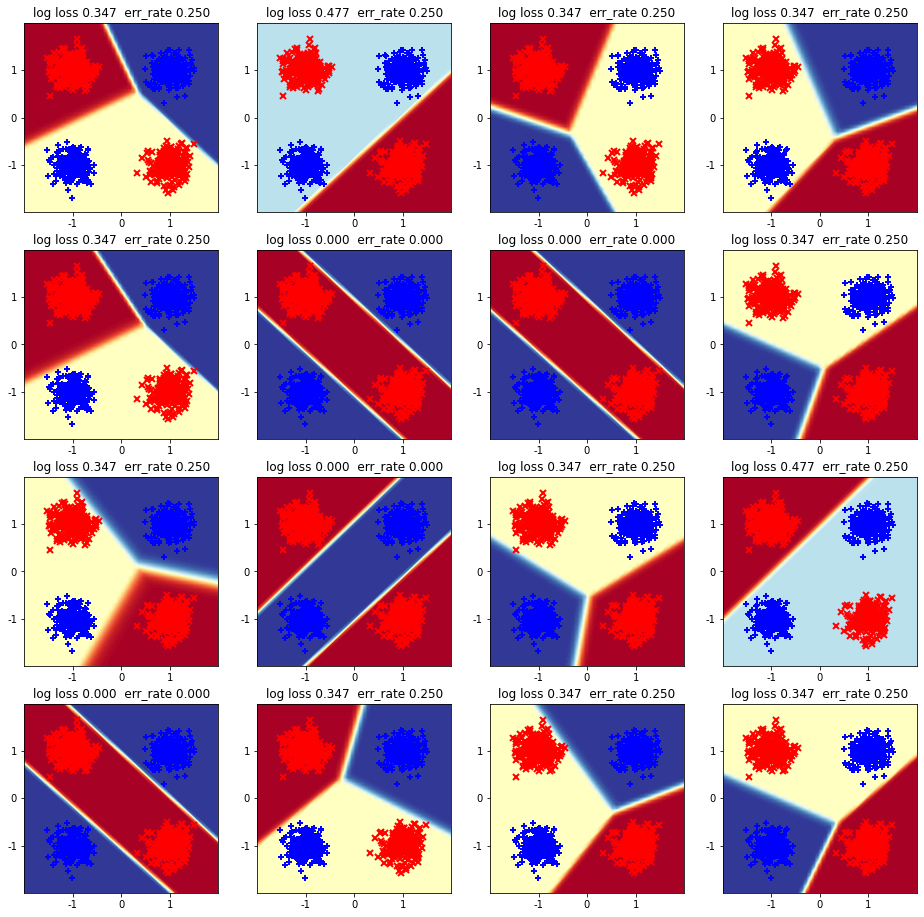

In [8]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

j = -1
for i in range(16):
    if i % 4 == 0:
        j += 1
    plot_pretty_probabilities_for_clf(models[i], x_tr_N2, y_tr_N, ax=ax_grid[j,i%4])


#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 25% of the models reach 0 training error. The models that do not reach 0 training error only correctly classify (i.e. highlight in either red or blue) one or two individual clusters. It can be seen that the models that classify two individual clusters have a log loss of 0.347 while the models that classify one individual cluster have a log loss of 0.477. In addition, all the models that did not reach 0 training error have an error rate of 0.25. Based on the timing and iteration metrics, the models seem to converge almost immediately.

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [10]:
# TODO edit this block to run 16 different random_state models with LOGISTIC activation

# Save each run's trained classifier object in a list
n_runs = 16
models_2 = []

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    models_2.append(mlp_lbfgs)
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))

finished LBFGS run  1/16 after    0.2 sec |  57 iters | converged    | loss 0.000
finished LBFGS run  2/16 after    0.1 sec | 120 iters | converged    | loss 0.347
finished LBFGS run  3/16 after    0.1 sec |  45 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.1 sec |  79 iters | converged    | loss 0.000
finished LBFGS run  5/16 after    0.0 sec |  40 iters | converged    | loss 0.477
finished LBFGS run  6/16 after    0.0 sec |  42 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.0 sec |  50 iters | converged    | loss 0.000
finished LBFGS run  8/16 after    0.0 sec |  42 iters | converged    | loss 0.477
finished LBFGS run  9/16 after    0.1 sec |  68 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    0.3 sec | 132 iters | converged    | loss 0.347
finished LBFGS run 11/16 after    0.1 sec |  84 iters | converged    | loss 0.347
finished LBFGS run 12/16 after    0.1 sec | 146 iters | converged    | loss 0.347
finished LBFGS r

#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

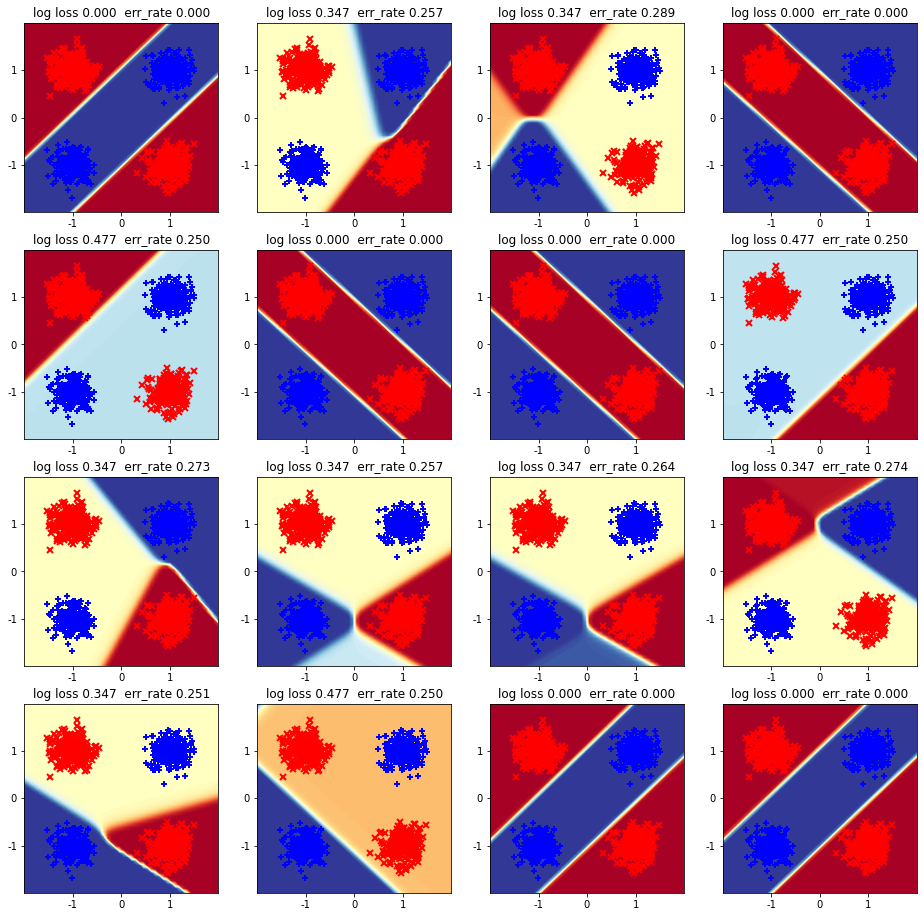

In [11]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

j = -1
for i in range(16):
    if i % 4 == 0:
        j += 1
    plot_pretty_probabilities_for_clf(models_2[i], x_tr_N2, y_tr_N, ax=ax_grid[j,i%4])

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 6 out of the 16 total models reach 0 training error. The models that do not reach 0 training error only correctly classify (i.e. highlight in either red or blue) one or two individual clusters, leaving either two or three clusters unclassified (yellow background). It can be seen that the models that classify two individual clusters have a log loss of 0.347 while the models that classify one individual cluster have a log loss of 0.477. In addition, all the models that did not reach 0 training error have a relatively close error rate in the range from 0.25 to 0.289. Based on the timing and iteration metrics, the models seem to converge almost immediately.

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [4]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list 

n_runs = 16
models_3 = []

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        alpha=0.0001,
        activation='relu',
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    models_3.append(mlp_sgd)
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))


ERROR! Session/line number was not unique in database. History logging moved to new session 124
finished SGD run  1/16 after   16.7 sec | 267 epochs | converged     | loss 0.347
finished SGD run  2/16 after   16.8 sec | 307 epochs | converged     | loss 0.478
finished SGD run  3/16 after   20.5 sec | 239 epochs | converged     | loss 0.347
finished SGD run  4/16 after   18.8 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  5/16 after   10.0 sec | 275 epochs | converged     | loss 0.347
finished SGD run  6/16 after   14.3 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  7/16 after   14.6 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  8/16 after   10.0 sec | 273 epochs | converged     | loss 0.347
finished SGD run  9/16 after    8.0 sec | 219 epochs | converged     | loss 0.347
finished SGD run 10/16 after   14.2 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run 11/16 after   14.2 sec | 394 epochs | converged     | loss 0.478
fi

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

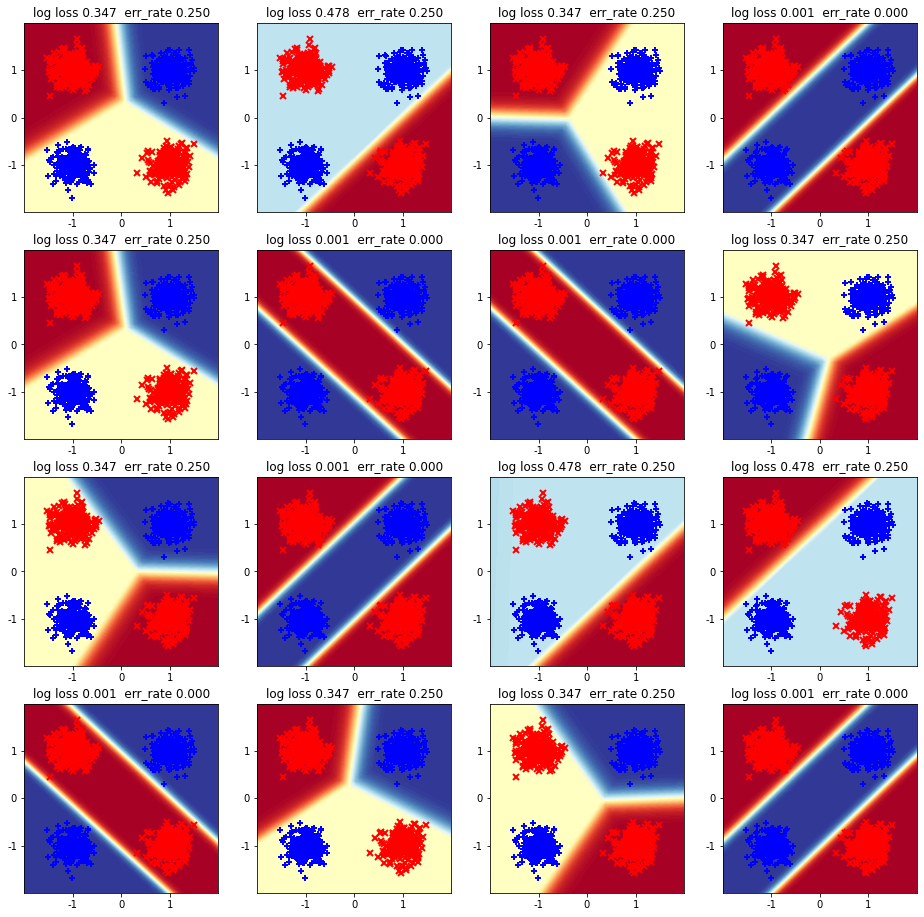

In [5]:
# TODO edit to plot all 16 runs from above

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

j = -1
for i in range(16):
    if i % 4 == 0:
        j += 1
    plot_pretty_probabilities_for_clf(models_3[i], x_tr_N2, y_tr_N, ax=ax_grid[j,i%4])

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 6 out of the 16 total models reach 0 training error. The models that do not reach 0 training error only correctly classify (i.e. highlight in either red or blue) one or two individual clusters, leaving either two or three clusters unclassified (yellow background). It can be seen that the models that classify two individual clusters have a log loss of 0.347 while the models that classify one individual cluster have a log loss of 0.478. In addition, all the models that did not reach 0 training error have an error rate of 0.25. Based on the timing and iteration metrics, the models seem to converge a lot slower, relative to the ReLU/L-BFGS and Logistic/L-BFGS models.

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**: The most notable difference between the SGD models with batch size 10 and the previous ReLU/L-BFGS models is the time and effort needed to optimze both types of models. The ReLU/L-BFGS models took at most 0.1 seconds and 39 iterations to converge while the ReLU/SGD models took at least 8 seconds and 219 epochs to converge. It is very clear that it takes a lot more effort, and therefore time, to optimize a SGD model to converge. I believe these differences exist because the L-BFGS method uses both the first and second derivatives while the SGD method uses only the first derivative. Intuitively, the L-BFGS models should take more time to converge as the L-BFGS method is more complex than then SGD method; however, I think that the L-BFGS method being more complex makes it much more efficient in getting to a final answer (model converging) and therefore requires less intermediate steps (iterations). This would explain why models with the L-BFGS solver take a lot less time than models with the SGD solver.

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [14]:
# TODO edit to do 16 runs of SGD, like in previous step, but with LOGISTIC activation
n_runs = 16
models_4 = []

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        alpha=0.0001,
        activation='logistic',
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    models_4.append(mlp_sgd)
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))

finished SGD run  1/16 after   11.2 sec | 161 epochs | converged     | loss 0.693
finished SGD run  2/16 after   21.6 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  3/16 after   19.5 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  4/16 after   11.3 sec | 215 epochs | converged     | loss 0.693
finished SGD run  5/16 after   16.0 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  6/16 after   14.5 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  7/16 after   15.6 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  8/16 after   14.3 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  9/16 after   14.6 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 10/16 after   15.4 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 11/16 after    4.8 sec | 124 epochs | converged     | loss 0.693
finished SGD run 12/16 after   14.7 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

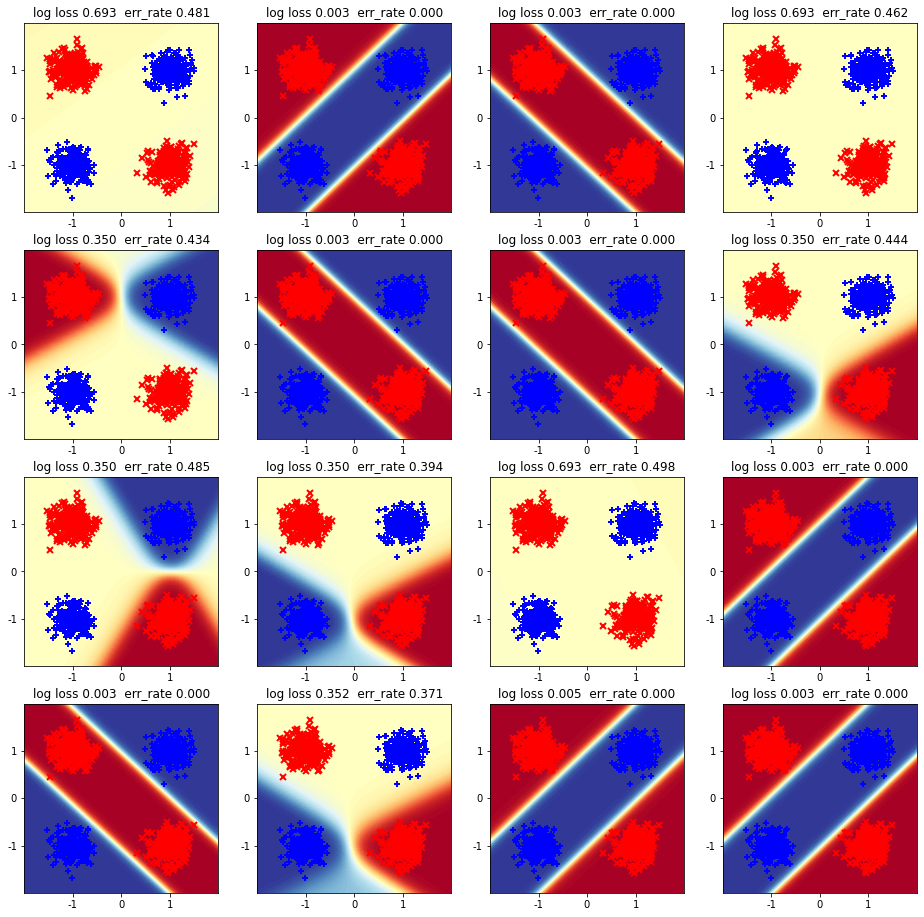

In [15]:
# TODO edit to plot all 16 runs from previous step

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

j = -1
for i in range(16):
    if i % 4 == 0:
        j += 1
    plot_pretty_probabilities_for_clf(models_4[i], x_tr_N2, y_tr_N, ax=ax_grid[j,i%4])

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 50% of the models reach 0 training error. The models that do not reach 0 training error only correctly classify (i.e. highlight in either red or blue) zero or two individual clusters, leaving either two or four clusters unclassified (yellow background). It can be seen that the models that classify two individual clusters have a log loss of 0.350 or 0.352 and an error rate ranging from 0.371 to 0.485 while the models that classify zero individual clusters have a log loss of 0.693 and an error rate ranging from 0.462 to 0.498. Based on the timing and iteration metrics, the models seem to converge a lot slower, relative to the ReLU/L-BFGS and Logistic/L-BFGS models.

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**: The most notable difference between the SGD models with batch size 10 and the previous Logistic/L-BFGS models is the time and effort needed to optimze both types of models. The Logistic/L-BFGS models took at most 0.3 seconds and between 33 and 146 iterations to converge while all but one of the SGD models took at least 10 seconds and 124 epochs to converge. It is very clear that it takes a lot more effort, and therefore time, to optimize a SGD model to converge. I believe these differences exist because the L-BFGS method uses both the first and second derivatives while the SGD method uses only the first derivative. Intuitively, the L-BFGS models should take more time to converge as the L-BFGS method is more complex than then SGD method; however, I think that the L-BFGS method being more complex makes it much more efficient in getting to a final answer (model converging) and therefore requires less intermediate steps (iterations). This would explain why models with the L-BFGS solver take a lot less time than models with the SGD solver.

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

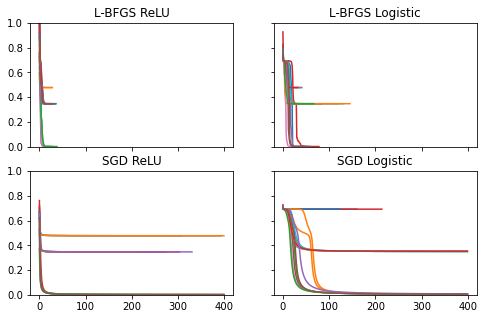

In [16]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

# TODO plot 16 curves for each of the 2x2 settings of solver and activation
ax_grid[0,0].set_title('L-BFGS ReLU')
for m in models:
    ax_grid[0,0].plot(m.loss_curve_)

    
ax_grid[0,1].set_title('L-BFGS Logistic')
for m in models_2:
    ax_grid[0,1].plot(m.loss_curve_)
    
    
ax_grid[1,0].set_title('SGD ReLU')
for m in models_3:
    ax_grid[1,0].plot(m.loss_curve_)


ax_grid[1,1].set_title('SGD Logistic')
for m in models_4:
    ax_grid[1,1].plot(m.loss_curve_)
    
    
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

**Answer:** Based on the plot above and the plots from the previous problems, it seems much easier to optimize the ReLU activation function rather than the Logistic Sigmoid. The plot above shows that the loss of models with the ReLU activation function (and either the L-BFGS or the SGD solver) drastically decreases extremely fast to the model's approximate convergence loss value and then is fine-tuned (supported by the graphs of these models being horizontal for the vast majority of iterations). Additionally, the two plots on the right-hand side above clearly show that models with the Logistic Sigmoid activation function take a lot more time and work (iterations) to even get relatively close to their convergence loss value. In general, the Logistic Sigmoid activation function requires more iterations.

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: Even though the ReLU activation function seems to be much easier to optimize for this data set, I am not convinced that it will always be easier to optimize than the Logistic Sigmoid activation function. In order to become convinced, the ReLU activation function must prove better in multiple different data sets. Such data sets that could shed light on if the ReLU activation function is in fact always easier to optimize are: data sets with many more classes, data sets where different class-clusters are much closer, data sets where data points are more spread out in an individual cluster. 